In [1]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
uploaded = files.upload()

Saving telecom_churn.csv to telecom_churn.csv


In [3]:
data = pd.read_csv('/content/telecom_churn.csv', delimiter = ',')
data.info() # Выводит основную информацию о данных: Количество строк, столбцов. Типы данных (числовые, строковые и т. д.). Количество ненулевых значений в каждом столбце.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

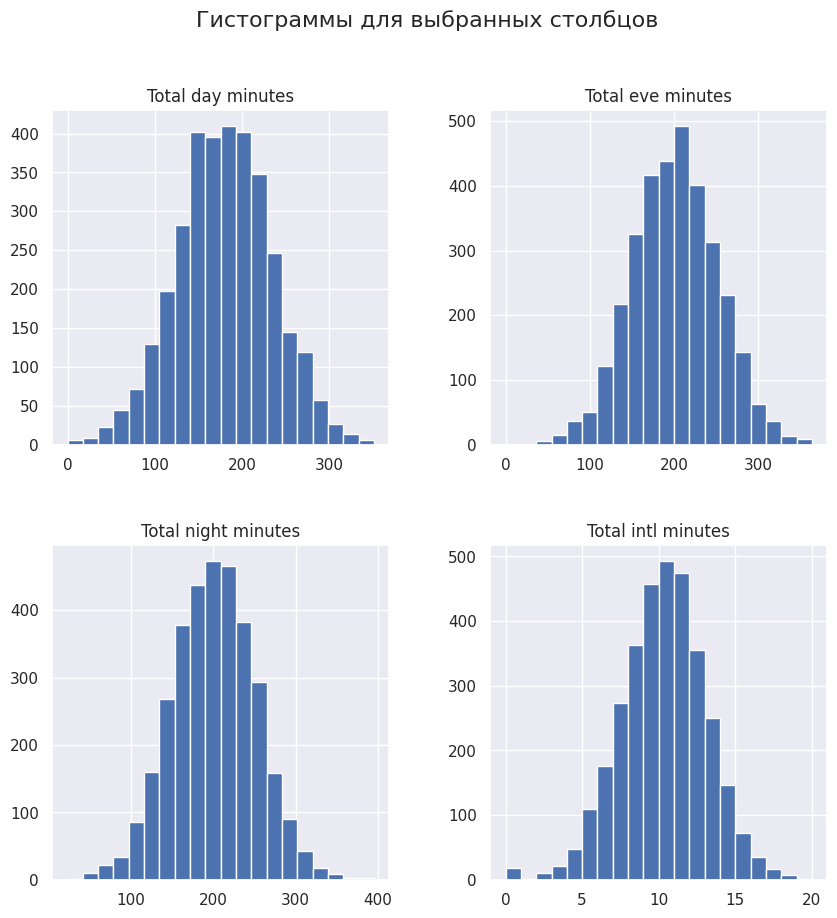

In [4]:
columns_to_plot = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'] # Список из четырех столбцов для анализа.

data[columns_to_plot].hist(figsize=(10, 10), bins=20) # Строит гистограммы для каждого выбранного столбца, bins - количество столбцов гистограммы
plt.suptitle('Гистограммы для выбранных столбцов', fontsize=16) # Добавляет общий заголовок к графикам
plt.show()

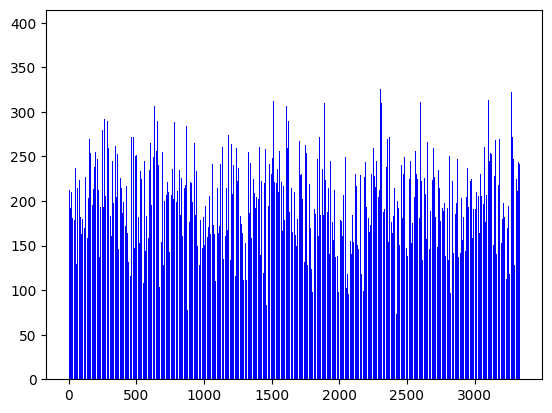

In [5]:
plt.style.use('default') # Строит столбчатую диаграмму
plt.bar(data.index, data['Total night minutes'], color='blue') # data.index - индексы строк. data['...'] - значения для оси Y.
plt.show()

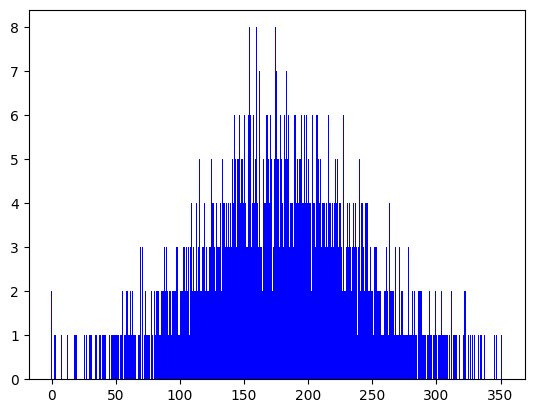

In [6]:
plt.style.use('default') # стандартный стиль оформления графиков
hist = data['Total day minutes'].value_counts() #  Выбираем столбец Total day minutes из DataFrame. value_counts() - считает, сколько раз каждое уникальное значение встречается в этом столбце.

plt.bar(hist.index, hist, color='blue'); # Строит столбчатую диаграмму. hist.index - значения (на оси X). hist - частоты (высота столбцов, ось Y).

Один из эффективных типов графиков для анализа количественных
признаков – это «ящие с усами» (boxplot). На рисунке 2.7 показан код и
реализованный график. Для анализа нескольких признаков графики boxplot
также эффективны. На рисунке 2.8 представлен код и результат построения
графиков для анализа пяти штатов с максимальным объемом дневных звонков.

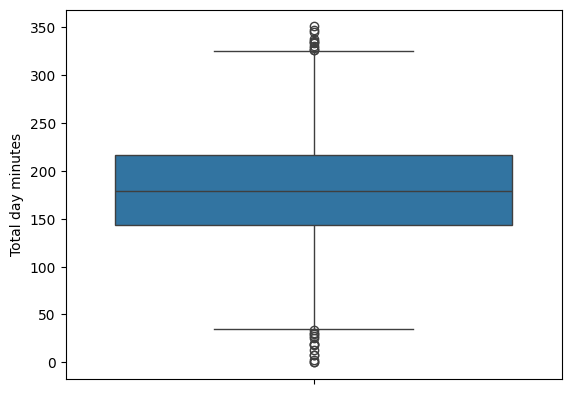

In [7]:
sns.boxplot(data['Total day minutes']); # Показывает распределение значений. Концы усов: минимальные и максимальные значения

<ipython-input-8-ca9b84d8032b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='State', # Показывает распределение минут по топ-5 штатам.


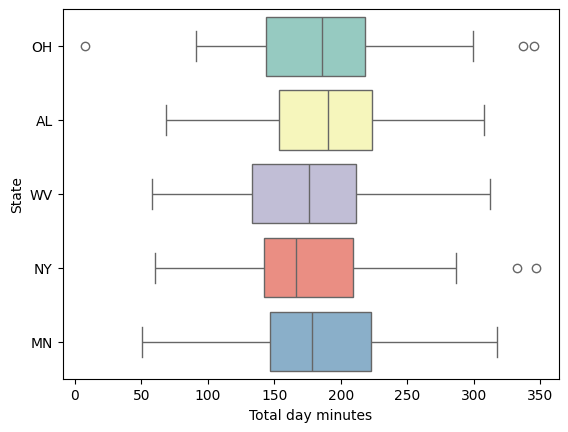

In [8]:
top_data = data[['State', 'Total day minutes']]
top_data = top_data.groupby('State').sum() # Группирует данные по столбцу State. Вычисляет сумму Total day minutes для каждого штата.
top_data = top_data.sort_values('Total day minutes', ascending=False) # Сортирует штаты по убыванию суммарных минут.
top_data = top_data[:5].index.values
sns.boxplot(y='State', # Показывает распределение минут по топ-5 штатам.
            x='Total day minutes',
            data=data[data. State.isin(top_data)], palette='Set3'); # Отбирает данные только для топ-5 штатов.

График boxplot состоит из коробки, усов и точек. Коробка показывает
интерквартильный размах распределения, то есть соответственно 25% ( первая
квартиль, 𝑄1) и 75% (𝑄3) перцентили. Черта внутри коробки обозначает
медиану распределения (можно получить с использованием метода median() в
pandas и numpy). Усы отображают весь разброс точек кроме выбросов, то есть
минимальные и максимальные значения, которые попадают в промежуток
(𝑄1 − 1,5 ∙ 𝐼𝑄𝑅, 𝑄3 + 1,5 ∙ 𝐼𝑄𝑅), где 𝐼𝑄𝑅 = 𝑄3 − 𝑄1 – интерквартильный
размах. Точками на графике обозначаются выбросы (outliers), то есть те значения, которые не вписываются в промежуток значений, заданный усами
графика (рисунок 2.9).

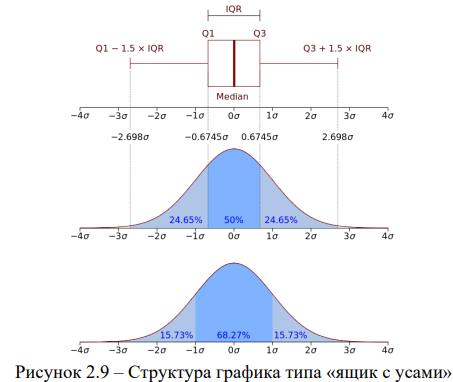

Одним из вариантов визуализации соотношения количественных
признаков является диаграмма по нескольким признакам (рисунки 2.4, 2.8).
Рассмотрим пример демонстрирующий сравнениераспределений показателей,
связанных с финансовыми затратами клиентов. Упрощенно, можно сказать,
что это все показатели, содержащие подстроку «charge» в имени показателя.
На рисунке 2.11 представлен код для отбора требуемых показателей.


In [ ]:
# Отбор числовых признаков, содержащих слово 'charge'
feats = [f for f in data.columns if 'charge' in f] # Находит столбцы, содержащие слово charge в названии.
feats

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

После отбора интересующих показателей можно построить диаграммы
для сравнения (рисунок 2.12).

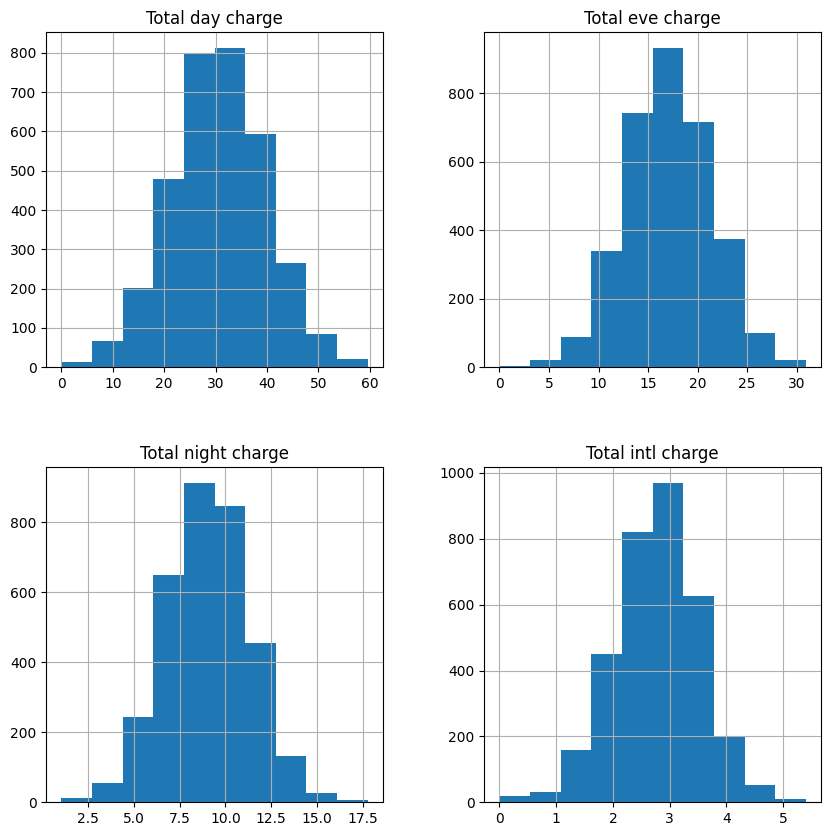

In [ ]:
# строим отдельные гистограммы # для нескольких признаков
data[feats].hist(figsize=(10,10)); # Строит гистограммы для всех столбцов с "charge".

Часто используют попарное сравнение признаков для обеспечения
широкого взгляда на набор данных (рисунок 2.13). На диаганальных графиках
рисунка 2.13 представлены гистограммы распределения отдельного признака,
на внедиаганальных позициях – попарные распределения.

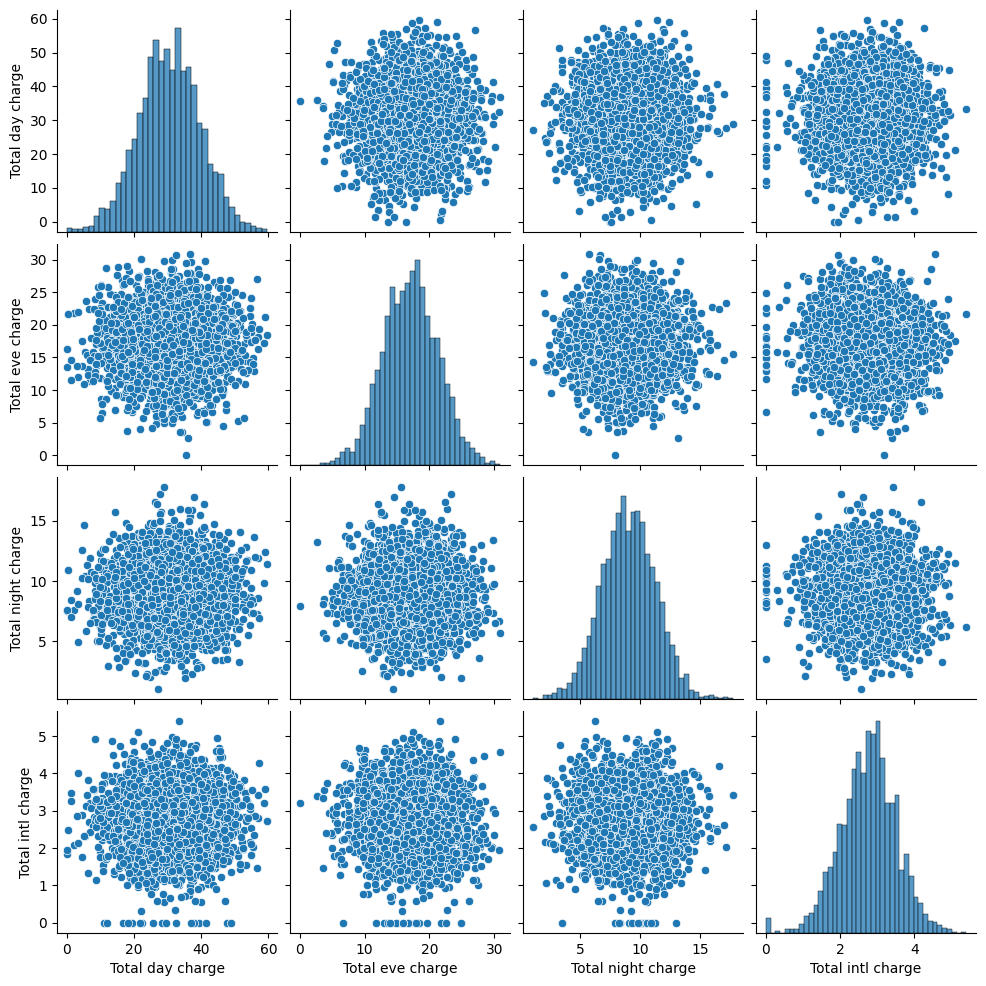

In [ ]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data[feats]); # Попарно сравнивает столбцы и создает диаграммы рассеяния.

Можно реализовать более сложные графики. Например, если требуется
добавить к существующим признакам, целевой признак Churn (количество
отказов) и раскрасить разные типы элементов, то можно воспользоваться
попарными распределениями, но с отображением подмножеств отказов
(рисунок 2.14).

До сих пор использовались возможности библиотеки seaborn, а также
методы pandas (которые производят визуализацию, оращаясь к библиотеке
matplotlib). Библиотека matplotlib наиболее известная и широко применяемая
при анализе данных в рамках стека технологий python.

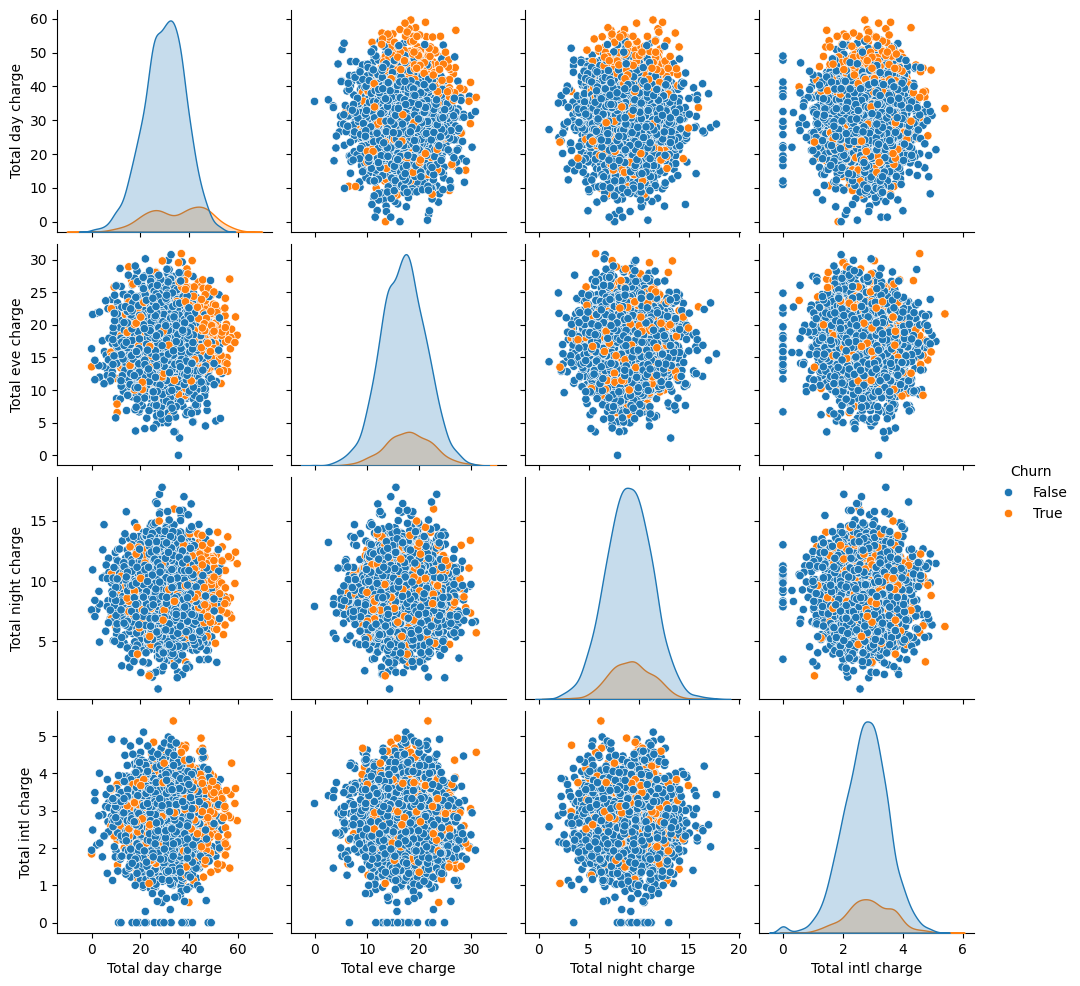

In [ ]:
sns.pairplot(data[feats + ['Churn']], hue ='Churn'); # Попарно сравнивает столбцы и создает диаграммы рассеяния. # цвет точек зависит от столбца Churn.

На рисунке 2.15 показан пример использования графика scatter
библиотеки matplotlib, предназначенного для вывода множества точек.

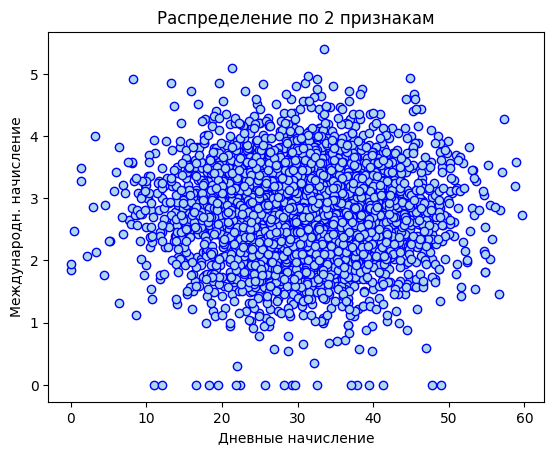

In [ ]:
plt.scatter(data['Total day charge'], # Строит диаграмму рассеяния.
data['Total intl charge'],
color='lightblue', edgecolors='blue')
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение по 2 признакам');

На рисунке 2.16 показан пример более тонкой настройки параметров
графика.

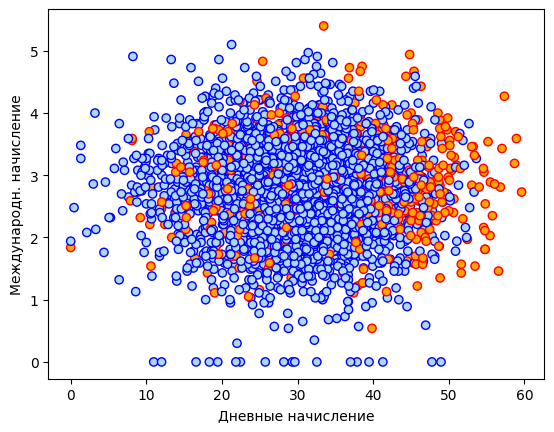

In [ ]:
# Раскрашивание данных
# Цвет в зависимости от ухода клиента
c = data['Churn'].map({False: 'lightblue', True: 'orange'})
edge_c = data['Churn'].map({False: 'blue', True: 'red'})
# Настройка графика
plt.scatter(data['Total day charge'], data['Total intl charge'], color=c, edgecolors=edge_c)
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление');

График на рисунке 2.16 можно построить различными способами,
например, можно добавлять множества точек отдельными подмножествами,
указывая параметры визуализации для каждого подмножества (рисунок 2.17).


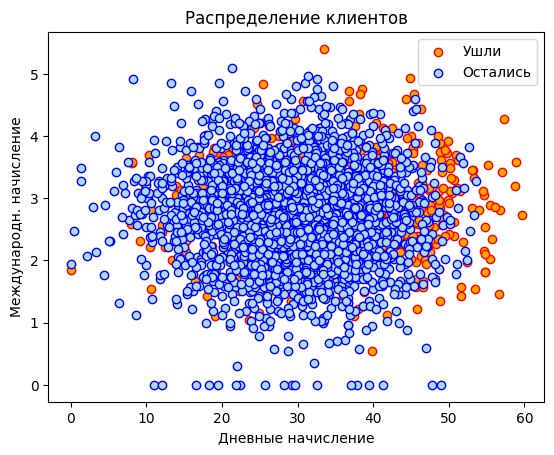

In [ ]:
#Ушедшие клиенты
data_churn = data[data['Churn']] # фильтрует строки, где значение в столбце Churn равно True.
# Оставшиеся клиенты
data_loyal = data[~data['Churn']] # фильтрует строки, где значение в Churn равно False.
plt.scatter(data_churn['Total day charge'], data_churn['Total intl charge'], # Строит диаграмму рассеяния.
color='orange', # цвет точек
edgecolors='red', # цвет контура точек
label='Ушли') # метка точки
plt.scatter(data_loyal['Total day charge'],
data_loyal['Total intl charge'],
color='lightblue',
edgecolors='blue',
label='Остались')
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение клиентов')
plt.legend();

В реальных задачах машинного обучения при первичном анализе
данных необходимо выявить корреляции признаков обучающей выборки. В
пакете Pandas имеется встроенный инструмент для этого – метод corr() класса
DataFrame. На рисунке 2.18 показан фрагмент вывода этой функции.


In [ ]:
#Применяется функция corr() из Pandas. Матрица корреляции
correlation_matrix = data.select_dtypes(include=['number']) # Отбирает только числовые столбцы.
correlation_matrix.corr() # Вычисляет корреляции между всеми числовыми столбцами.

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


Полученная матрица имеет размер 17 × 17. Это незначительный размер
(в реальных задачах машинного обучения размеры матриц корреляции имеют
порядки 106 − 1010 и более), но даже для матрицы рассматриваемого набора данных проанализировать корреляцию признаков вручную – трудоемкая
задача. Например, можно использовать скрипты, для выделения больших
коэффициентов корреляции. Но лучше использовать специальный тип
графика – heatmap (рисунок 2.19).

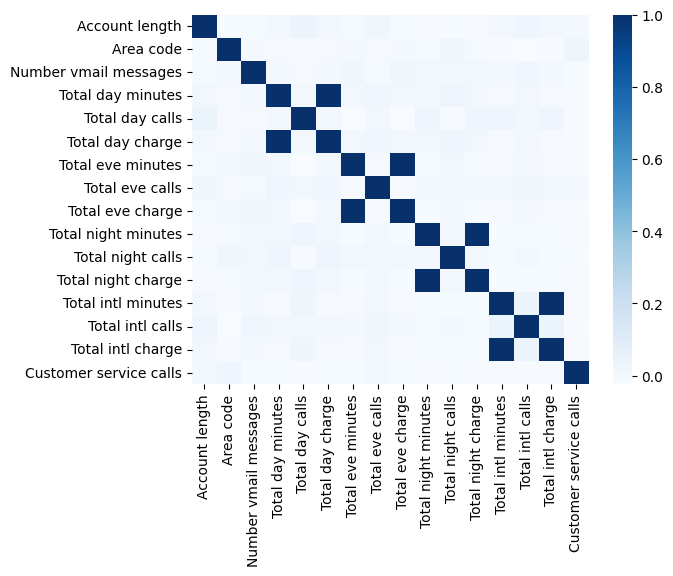

In [ ]:
sns.heatmap(correlation_matrix.corr(), annot=True, cmap=plt.cm.Blues); # Визуализирует корреляции в виде тепловой карты.

Коррелирующие признаки обычно удаляются и не рассматриваются в
процессе обучения.

Индивидуальные задания:
1. Подберите набор данных на ресурсах [3, 4] и согласуйте свой выбор с
преподавателем. Студент может предложить набор данных в соответствии с
тематикой магистерского исследования.
2. Проведите первичный анализ данных. Особое внимание следует
уделить графическому представлению распрееделений признаков,
визуализации взаимосвзей, позволяющие судить о наборе данных. Построение
графиков желательно произвести по нескольким проекциям. При анализе
данных использовать как можно более разнообразные типы графиков.

In [ ]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


**1. Загрузка данных и предварительный просмотр**

Загрузим данные и изучим их структуру:

In [ ]:
# Загрузка данных
file_path = "/content/Mall_Customers.csv"
data = pd.read_csv(file_path)

# Просмотр первых строк данных
print(data.head()) # Первые 5 строк.
print(data.info()) # Выводит основную информацию о данных

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


**2. Построение гистограмм для нескольких признаков**

Гистограммы помогут понять распределение данных:

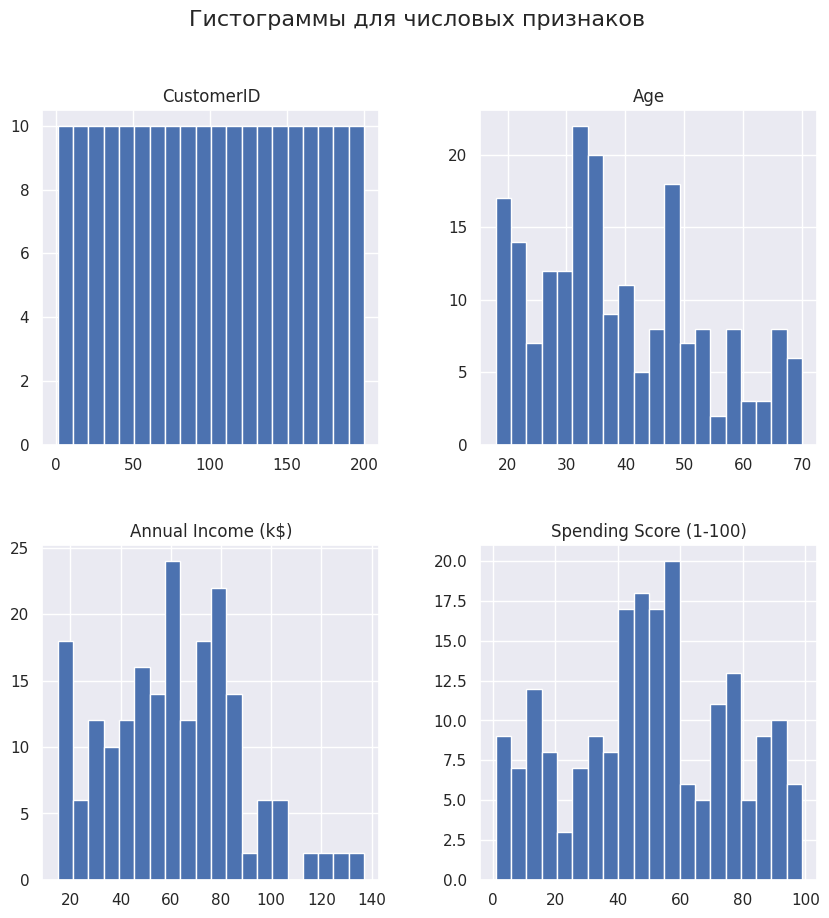

In [ ]:

# Отбор числовых признаков
numeric_features = data.select_dtypes(include=['number']).columns.tolist() # Находит числовые столбцы.

# Построение гистограмм
data[numeric_features].hist(figsize=(10, 10), bins=20) # Гистограммы для числовых данных.
plt.suptitle('Гистограммы для числовых признаков', fontsize=16)
plt.show()


**3. График "барчарт" для одного признака**

Построим барчарт для распределения одного из числовых признаков:

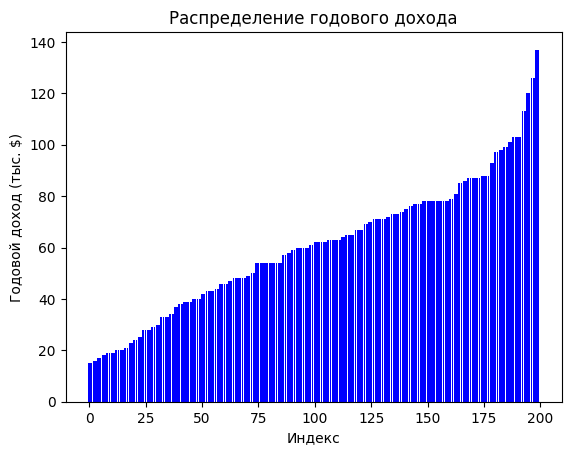

In [ ]:
plt.bar(data.index, data['Annual Income (k$)'], color='blue') # Построение столбчатой диаграммы.
plt.xlabel('Индекс')
plt.ylabel('Годовой доход (тыс. $)')
plt.title('Распределение годового дохода')
plt.show()


**4. Boxplot**

Проанализируем распределение признаков с помощью ящика с усами:

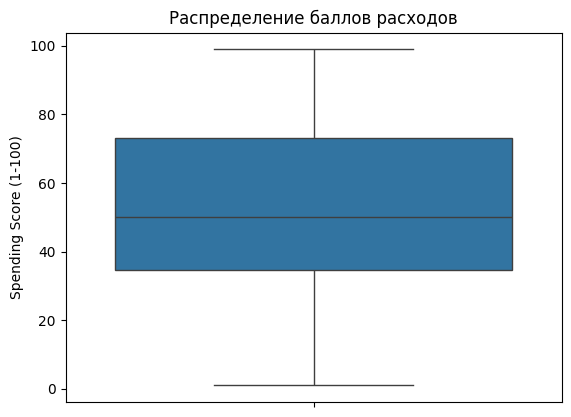

In [ ]:
import seaborn as sns

sns.boxplot(data['Spending Score (1-100)']) # Функция для построения boxplot (коробчатой диаграммы)
plt.title('Распределение баллов расходов')
plt.show() # Отсутствуют выбросы (<25% и >75%)


**5. Топ-5 категорий**

Рассмотрим данные о топ-5 значениях категориального признака (если он есть):

<ipython-input-7-a49a1cb8f514>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_data.index, y=top_data.values, palette='Set3')


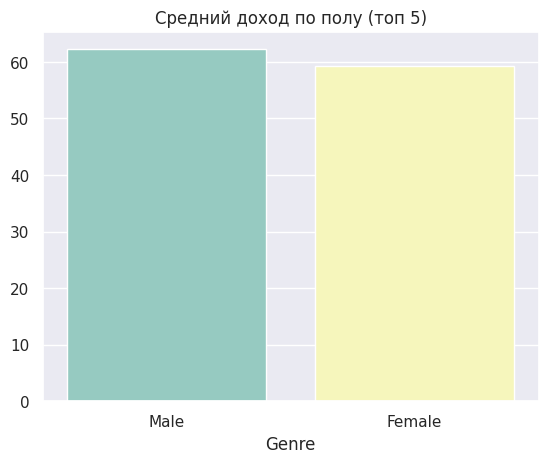

In [ ]:
# Группировка данных по категориям
# Группирует строки DataFrame data по уникальным значениям в столбце Genre и выбирает столбец Annual Income (k$) для расчета
# mean(): Рассчитывает среднее значение годового дохода для каждой группы (например, для мужчин и женщин).
# sort_values(ascending=False): Сортирует результаты в порядке убывания среднего дохода.
# head(5): Отбирает первые 5 строк (групп) с наибольшим средним доходом.
top_data = data.groupby('Genre')['Annual Income (k$)'].mean().sort_values(ascending=False).head(5)
# Построение столбчатой диаграммы
# Палитра Set3 предлагает мягкие, разнообразные цвета для столбцов.
sns.barplot(x=top_data.index, y=top_data.values, palette='Set3')
plt.title('Средний доход по полу (топ 5)')
plt.show()


**6. Попарное распределение признаков**

Сравним взаимосвязи между признаками:

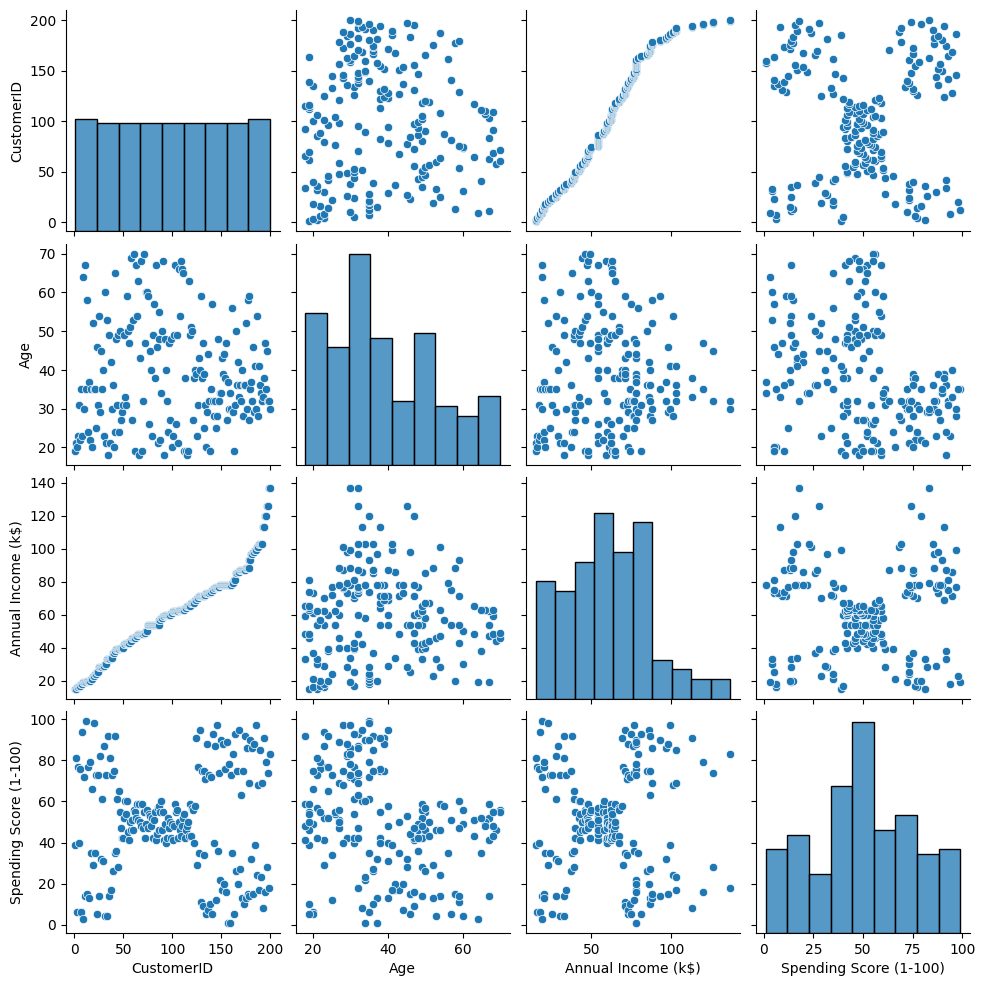

In [ ]:
# Создает сетку графиков, показывающих все возможные попарные комбинации числовых признаков с использованием числовых признаков
sns.pairplot(data[numeric_features])
plt.show()


**7. Матрица корреляций**

Исследуем корреляции между числовыми признаками:

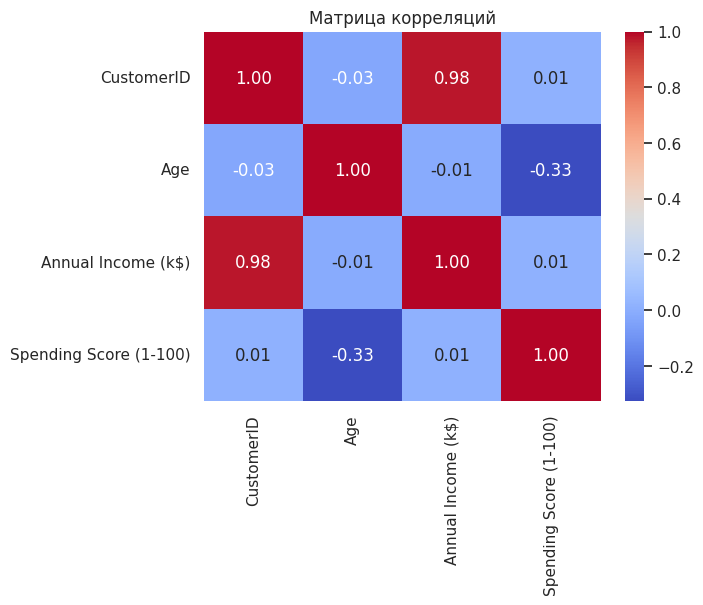

In [ ]:
# Мы выбираем подмножество данных, состоящее из числовых признаков.
# Делаем вычисление матрицы корреляций для выбранных признаков.
correlation_matrix = data[numeric_features].corr()
# Отображение матрицы данных в виде тепловой карты.
# annot=True — включает отображение числовых значений в каждой ячейке матрицы.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()


**8. Разделение на группы**

Анализируем группы на основе признака, например, пола:

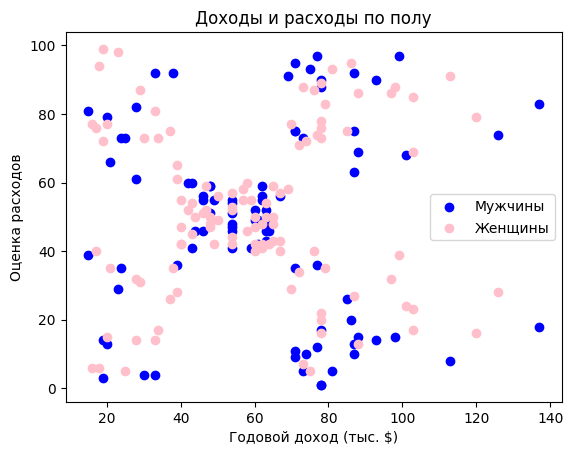

In [ ]:
male_data = data[data['Genre'] == 'Male']
female_data = data[data['Genre'] == 'Female']
# Рисуем график рассеяния
plt.scatter(male_data['Annual Income (k$)'], male_data['Spending Score (1-100)'], color='blue', label='Мужчины')
plt.scatter(female_data['Annual Income (k$)'], female_data['Spending Score (1-100)'], color='pink', label='Женщины')
plt.xlabel('Годовой доход (тыс. $)')
plt.ylabel('Оценка расходов')
plt.title('Доходы и расходы по полу')
plt.legend()
plt.show()
